In [32]:
import pandas as pd
import seaborn as sns
import numpy as np

In [33]:
data = pd.read_csv('COVID-19_Outcomes_by_Testing_Cohorts__Cases__Hospitalizations__and_Deaths.csv')

In [34]:
data.head()

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,04/29/2020,04/17/2020,9979,3386,527,96
1,04/29/2020,02/08/2020,1,0,0,0
2,04/29/2020,03/05/2020,63,5,3,1
3,04/29/2020,04/09/2020,9019,4803,1253,386
4,04/29/2020,04/03/2020,9389,5523,1688,582


In [35]:
data.tail(7)

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
44434,12/24/2020,07/16/2020,18556,641,44,9
44435,12/24/2020,10/16/2020,15812,570,45,0
44436,12/24/2020,06/18/2020,17785,605,76,5
44437,12/24/2020,07/08/2020,19812,737,62,8
44438,12/24/2020,03/16/2020,4951,2342,503,140
44439,12/24/2020,12/14/2020,21700,1758,115,6
44440,12/24/2020,11/20/2020,21672,1202,91,7


In [36]:
data.columns

Index(['extract_date', 'specimen_date', 'Number_tested', 'Number_confirmed',
       'Number_hospitalized', 'Number_deaths'],
      dtype='object')

In [37]:
data.shape

(44441, 6)

In [38]:
data.describe()

,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
count,44441.000000,44441.000000,44441.000000,44441.000000
mean,10264.597579,1292.182894,312.771810,103.588736
std,6176.353680,1632.767311,516.012254,195.873226
min,1.000000,0.000000,0.000000,0.000000
25%,6255.000000,229.000000,25.000000,2.000000
50%,9625.000000,454.000000,50.000000,6.000000
75%,15698.000000,1899.000000,301.000000,88.000000
max,24172.000000,6502.000000,2016.000000,853.000000


In [39]:
data.isnull().sum()

extract_date           0
specimen_date          0
Number_tested          0
Number_confirmed       0
Number_hospitalized    0
Number_deaths          0
dtype: int64

In [40]:
Y = data.Number_deaths
Y

0         96
1          0
2          1
3        386
4        582
5        429
6        231
7        237
8         59
9         18
10         4
11         9
12         9
13       517
14       198
15         0
16       557
17       433
18       624
19       471
20         0
21       244
22       479
23        79
24       241
25       518
26         0
27       422
28       179
29         0
        ... 
44411      8
44412     39
44413    583
44414    776
44415    265
44416    570
44417      5
44418      6
44419    282
44420      8
44421      7
44422      9
44423      7
44424      7
44425     15
44426    301
44427    769
44428      4
44429      7
44430      5
44431      0
44432      3
44433      6
44434      9
44435      0
44436      5
44437      8
44438    140
44439      6
44440      7
Name: Number_deaths, Length: 44441, dtype: int64

In [41]:
X = data.drop(['Number_deaths', 'specimen_date', 'extract_date'], axis=1)
X

,Number_tested,Number_confirmed,Number_hospitalized
0,9979,3386,527
1,1,0,0
2,63,5,3
3,9019,4803,1253
4,9389,5523,1688
5,7457,4803,1395
6,4713,2663,757
7,7756,4121,889
8,1702,684,217
9,8683,2092,230


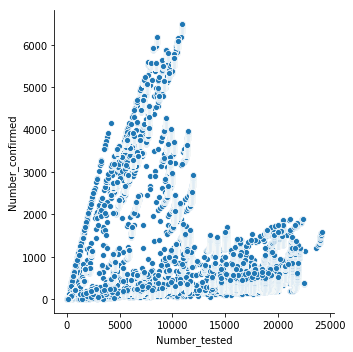

In [42]:
sns.relplot(x='Number_tested', y='Number_confirmed', data=data)

# 80-20 Data Split

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=2)

In [45]:
X_train.shape, Y_train.shape

((35552, 3), (35552,))

In [46]:
X_test.shape, Y_test.shape

((8889, 3), (8889,))

# Linear Regression Model

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
regr = LinearRegression()

In [49]:
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
Y_pred = regr.predict(X_test)

In [51]:
Y_pred

array([-1.28238974e+01, -3.18806831e-01,  7.49796151e+02, ...,
        1.09353376e+01,  8.62167818e+01, -1.23723736e+01])

In [52]:
regr.score(X_test, Y_test)

0.9791136705611725

# Prediction Results

In [53]:
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)
print("Mean Squared Error: %.2f" % mean_squared_error(Y_test, Y_pred))
print("Coefficient of determination (R^2) : %.2f" % r2_score(Y_test, Y_pred))

Coefficients:  [ 0.00067164 -0.02454965  0.45152379]
Intercept:  -12.824569029372228
Mean Squared Error: 792.92
Coefficient of determination (R^2) : 0.98


In [54]:
r2_score(Y_test, Y_pred)

0.9791136705611725

# Scatter Plot Visualization

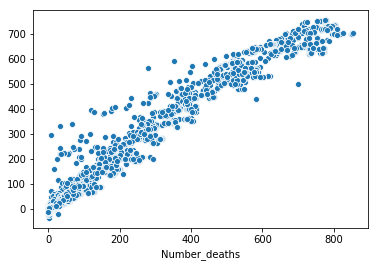

In [55]:
sns.scatterplot(Y_test, Y_pred)

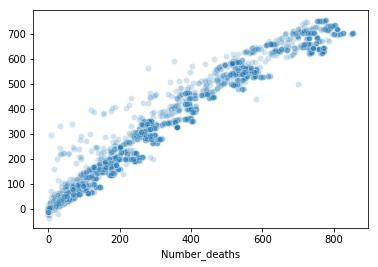

In [56]:
sns.scatterplot(Y_test, Y_pred, alpha=0.2)